In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
from pathlib import Path
import os

In [2]:
def calculate_statistics(folders: list):
    for i, folder in enumerate(folders):
        if i == 0:
            df = pd.read_csv(os.path.join(folder, 'metrics.csv'))
            df_agg = pd.read_csv(os.path.join(folder, 'agg_metrics.csv'))
            df_list = [df]
            df_agg_list = [df_agg]
        else:
            df = pd.read_csv(os.path.join(folder, 'metrics.csv'))
            df_agg = pd.read_csv(os.path.join(folder, 'agg_metrics.csv'))
            df_list.append(df)
            df_agg_list.append(df_agg)

    # Calculate mean
    df_mean = sum(df_list) / len(folders)
    df_agg_mean = sum(df_agg_list) / len(folders)
    
    # Calculate standard deviation
    df_std = pd.DataFrame(np.sqrt(sum((x - df_mean)**2 for x in df_list) / len(folders)))
    df_agg_std = pd.DataFrame(np.sqrt(sum((x - df_agg_mean)**2 for x in df_agg_list) / len(folders)))

    return df_mean, df_std, df_agg_mean, df_agg_std


In [3]:
# folders = ['/home/users/qnguyen/Graph/save_inference_result/exp_02_01/',
#            '/home/users/qnguyen/Graph/save_inference_result/exp_02_02/',
#            '/home/users/qnguyen/Graph/save_inference_result/exp_02_03/',
#            '/home/users/qnguyen/Graph/save_inference_result/exp_02_04/',
#            '/home/users/qnguyen/Graph/save_inference_result/exp_02_05/']
folders = ['/home/users/qnguyen/Graph/save_inference_result/exp_01_01/',
           '/home/users/qnguyen/Graph/save_inference_result/exp_01_02/',
           '/home/users/qnguyen/Graph/save_inference_result/exp_01_03/',
           '/home/users/qnguyen/Graph/save_inference_result/exp_01_04/',
           '/home/users/qnguyen/Graph/save_inference_result/exp_01_05/']
df_mean, df_std, df_agg_mean, df_agg_std = calculate_statistics(folders)


In [7]:
df_mean.iloc[-3:]

,RNNModel,VARModel,AGCRNModel,TransformerModel,BiPartiteSTGraphModel,SameHour,GRUGCNModel,TGCNModel_2,GraphConvLSTMModel,GraphWaveNetModel,GatedGraphNetworkModel,TGCNModel
3,0.089517,0.134344,0.090949,0.090404,0.090154,0.114375,0.090622,0.089823,0.090128,0.091417,0.088574,0.088606
4,0.447344,1.096422,0.491139,0.449466,0.488696,0.664402,0.459766,0.451916,0.453818,0.481686,0.458643,0.434295
5,0.193855,0.218443,0.190811,0.194554,0.188398,0.238581,0.193976,0.194600,0.193989,0.196801,0.188884,0.193491


In [8]:
df_std.iloc[-3:]

,RNNModel,VARModel,AGCRNModel,TransformerModel,BiPartiteSTGraphModel,SameHour,GRUGCNModel,TGCNModel_2,GraphConvLSTMModel,GraphWaveNetModel,GatedGraphNetworkModel,TGCNModel
3,0.000150,0.000218,0.000194,0.000453,0.000090,0.000000e+00,0.000300,0.000338,0.000460,0.000152,0.000147,0.000337
4,0.002398,0.005628,0.003296,0.007308,0.004928,0.000000e+00,0.010134,0.004825,0.005039,0.007402,0.006131,0.005686
5,0.000286,0.000273,0.000577,0.000394,0.000297,2.775558e-17,0.000404,0.000438,0.000560,0.000700,0.000378,0.000346


In [9]:
df_agg_mean.iloc[-3:]

,RNNModel,VARModel,AGCRNModel,TransformerModel,BiPartiteSTGraphModel,SameHour,GRUGCNModel,TGCNModel_2,GraphConvLSTMModel,GraphWaveNetModel,GatedGraphNetworkModel,TGCNModel
3,8.505822,3.444817,7.851759,8.935635,6.739304,3.388130,8.296817,8.702347,8.471906,8.821999,8.138029,8.742432
4,0.168136,0.070842,0.150816,0.174790,0.134398,0.067828,0.162769,0.171182,0.169403,0.170627,0.157790,0.171880
5,9.976607,4.561665,9.376769,10.451557,8.191828,4.574069,9.823199,10.192530,9.881067,10.413156,9.683175,10.241657


In [10]:
df_agg_std.iloc[-3:]

,RNNModel,VARModel,AGCRNModel,TransformerModel,BiPartiteSTGraphModel,SameHour,GRUGCNModel,TGCNModel_2,GraphConvLSTMModel,GraphWaveNetModel,GatedGraphNetworkModel,TGCNModel
3,0.160607,0.017368,0.117740,0.355519,0.247393,4.440892e-16,0.414549,0.255398,0.490252,0.422310,0.382244,0.324158
4,0.004222,0.000285,0.002123,0.006566,0.005442,0.000000e+00,0.008676,0.006770,0.012433,0.009431,0.007781,0.005618
5,0.139822,0.040096,0.163125,0.394885,0.251404,0.000000e+00,0.413823,0.212730,0.419026,0.488342,0.358474,0.343144


In [11]:
folders = ['/home/users/qnguyen/Graph/save_inference_result/exp_02_01/',
           '/home/users/qnguyen/Graph/save_inference_result/exp_02_02/',
           '/home/users/qnguyen/Graph/save_inference_result/exp_02_03/',
           '/home/users/qnguyen/Graph/save_inference_result/exp_02_04/',
           '/home/users/qnguyen/Graph/save_inference_result/exp_02_05/']
df_mean, df_std, df_agg_mean, df_agg_std = calculate_statistics(folders)

In [12]:
df_mean

,AGCRNModel,BiPartiteSTGraphModel,GatedGraphNetworkModel,GraphWaveNetModel,RNNModel,SameHour,TransformerModel,VARModel
0,0.123868,0.121539,0.121389,NaN,0.126539,0.156408,0.127903,0.167624
1,0.503997,0.496732,0.495832,NaN,0.506399,0.759228,0.520649,1.065961
2,0.248698,0.245804,0.245048,NaN,0.254593,0.304082,0.255397,0.283881


In [4]:
metrics_1 = pd.read_csv('/home/users/qnguyen/Graph/save_inference_result/exp_05/correntropy/metrics.csv')

# metrics_agg = pd.read_csv('/home/users/qnguyen/Graph/save_inference_result/correntropy/agg_metrics.csv')
metrics_1

,Unnamed: 0,LastValue,GRUGCNModel,GraphConvLSTMModel,GraphWaveNetModel,RNNModel,STEGNN,VARModel,AGCRNModel,TransformerModel,TGCNModel,BiPartiteSTGraphModel,SameHour
0,MAE,0.114375,0.090420,0.138110,0.091624,0.089492,3.148330,0.134583,0.090540,0.090079,0.089911,0.090081,0.114375
1,MAPE,0.664402,0.439693,1.216109,0.498264,0.447116,35.895640,1.094321,0.489444,0.449024,0.448781,0.477646,0.664402
2,RMSE,0.238581,0.194594,0.238005,0.197139,0.193910,4.061575,0.219056,0.190702,0.193974,0.193863,0.189012,0.238581


In [5]:
metrics_2 = pd.read_csv('/home/users/qnguyen/Graph/save_inference_result/exp_05/dtw/metrics.csv')

# metrics_agg = pd.read_csv('/home/users/qnguyen/Graph/save_inference_result/correntropy/agg_metrics.csv')
metrics_2

,Unnamed: 0,LastValue,GRUGCNModel,GraphConvLSTMModel,GraphWaveNetModel,RNNModel,STEGNN,VARModel,AGCRNModel,TransformerModel,TGCNModel,BiPartiteSTGraphModel,SameHour
0,MAE,0.114375,0.090320,0.138106,0.091276,0.090835,3.135893,0.135169,0.090250,0.090274,0.090193,0.090435,0.114375
1,MAPE,0.664402,0.460312,1.215161,0.474386,0.455078,34.969080,1.107921,0.483568,0.451185,0.459039,0.504715,0.664402
2,RMSE,0.238581,0.193427,0.237949,0.197047,0.194957,4.003904,0.219149,0.190164,0.194150,0.193741,0.187877,0.238581


In [6]:
metrics_3 = pd.read_csv('/home/users/qnguyen/Graph/save_inference_result/exp_05/euclidean/metrics.csv')
metrics_3

,Unnamed: 0,LastValue,GRUGCNModel,GraphConvLSTMModel,GraphWaveNetModel,RNNModel,STEGNN,VARModel,AGCRNModel,TransformerModel,TGCNModel,BiPartiteSTGraphModel,SameHour
0,MAE,0.114375,0.091799,0.138246,0.091371,0.089957,2.832746,0.134371,0.090577,0.091221,0.090022,0.090145,0.114375
1,MAPE,0.664402,0.476761,1.224468,0.488819,0.441173,31.797064,1.092040,0.481576,0.458919,0.454887,0.485086,0.664402
2,RMSE,0.238581,0.193890,0.237535,0.195440,0.194159,3.594667,0.218513,0.191108,0.195133,0.194061,0.188371,0.238581


In [7]:
metrics_4 = pd.read_csv('/home/users/qnguyen/Graph/save_inference_result/exp_05/pearson/metrics.csv')
metrics_4

,Unnamed: 0,LastValue,GRUGCNModel,GraphConvLSTMModel,GraphWaveNetModel,RNNModel,STEGNN,VARModel,AGCRNModel,TransformerModel,TGCNModel,BiPartiteSTGraphModel,SameHour
0,MAE,0.114375,0.090225,0.139814,0.091032,0.09001,2.908877,0.134664,0.090028,0.090828,0.089681,0.090188,0.114375
1,MAPE,0.664402,0.437904,1.226211,0.506029,0.43326,33.260532,1.094743,0.474827,0.455684,0.444366,0.477954,0.664402
2,RMSE,0.238581,0.195888,0.241462,0.194363,0.19519,3.561686,0.218914,0.190454,0.194571,0.193895,0.188491,0.238581


In [8]:
metrics_5 = pd.read_csv('/home/users/qnguyen/Graph/save_inference_result/exp_05/transfer_entropy/metrics.csv')
metrics_5

,Unnamed: 0,LastValue,GRUGCNModel,GraphConvLSTMModel,GraphWaveNetModel,RNNModel,STEGNN,VARModel,AGCRNModel,TransformerModel,TGCNModel,BiPartiteSTGraphModel,SameHour
0,MAE,0.114375,0.090576,0.140070,0.091085,0.090207,3.308321,0.134230,0.090905,0.091048,0.091075,0.090132,0.114375
1,MAPE,0.664402,0.449553,1.240531,0.500625,0.447732,37.377316,1.101047,0.491013,0.464435,0.454205,0.493936,0.664402
2,RMSE,0.238581,0.194404,0.241291,0.195601,0.194164,4.107784,0.218567,0.190966,0.193811,0.194294,0.187822,0.238581


In [9]:
metrics_sum = (metrics_1 + metrics_2 + metrics_3 + metrics_4 + metrics_5)
for column in metrics_sum.columns:
    try:
        metrics_sum[column] = metrics_sum[column] / 5
    except:
        print(column)
        continue 
metrics_sum

Unnamed: 0


,Unnamed: 0,LastValue,GRUGCNModel,GraphConvLSTMModel,GraphWaveNetModel,RNNModel,STEGNN,VARModel,AGCRNModel,TransformerModel,TGCNModel,BiPartiteSTGraphModel,SameHour
0,MAEMAEMAEMAEMAE,0.114375,0.090668,0.138869,0.091277,0.090100,3.066833,0.134603,0.090460,0.090690,0.090176,0.090196,0.114375
1,MAPEMAPEMAPEMAPEMAPE,0.664402,0.452844,1.224496,0.493625,0.444872,34.659926,1.098014,0.484086,0.455849,0.452256,0.487867,0.664402
2,RMSERMSERMSERMSERMSE,0.238581,0.194440,0.239249,0.195918,0.194476,3.865923,0.218840,0.190679,0.194328,0.193971,0.188315,0.238581


In [44]:
metrics_1 = pd.read_csv('/home/users/qnguyen/Graph/save_inference_result/exp_11/correntropy/agg_metrics.csv')

# metrics_agg = pd.read_csv('/home/users/qnguyen/Graph/save_inference_result/correntropy/agg_metrics.csv')
metrics_1

,Unnamed: 0,GraphConvLSTMModel,SameHour
0,MAE,25.221441,5.478348
1,MAPE,0.366573,0.082447
2,RMSE,28.857706,7.958182


In [10]:
metrics_2 = pd.read_csv('/home/users/qnguyen/Graph/save_inference_result/exp_06/dtw/metrics.csv')

# metrics_agg = pd.read_csv('/home/users/qnguyen/Graph/save_inference_result/correntropy/agg_metrics.csv')
metrics_2

,Unnamed: 0,LastValue,GRUGCNModel,GraphConvLSTMModel,GraphWaveNetModel,RNNModel,VARModel,GatedGraphNetworkModel,AGCRNModel,TransformerModel,TGCNModel,BiPartiteSTGraphModel,SameHour
0,MAE,0.183705,0.132346,0.136527,0.126983,0.131772,0.149088,0.088264,0.127719,0.132051,0.132322,0.129447,0.183705
1,MAPE,1.320847,0.853557,1.148982,0.815414,0.856533,1.263404,0.453301,0.826492,0.871001,0.851095,0.843343,1.320847
2,RMSE,0.348368,0.250031,0.240513,0.240728,0.247641,0.235281,0.188421,0.243470,0.245979,0.250958,0.246912,0.348368


In [11]:
metrics_3 = pd.read_csv('/home/users/qnguyen/Graph/save_inference_result/exp_06/euclidean/metrics.csv')
metrics_3

,Unnamed: 0,LastValue,GRUGCNModel,GraphConvLSTMModel,GraphWaveNetModel,RNNModel,VARModel,GatedGraphNetworkModel,AGCRNModel,TransformerModel,TGCNModel,BiPartiteSTGraphModel,SameHour
0,MAE,0.183705,0.132306,0.136276,0.128189,0.132726,0.151123,0.088679,0.126998,0.131620,0.131248,0.127188,0.183705
1,MAPE,1.320847,0.863056,1.143720,0.825257,0.859077,1.276361,0.473551,0.809103,0.861080,0.848065,0.827164,1.320847
2,RMSE,0.348368,0.248929,0.240806,0.243930,0.250245,0.238734,0.187164,0.242316,0.245791,0.248746,0.240563,0.348368


In [12]:
metrics_4 = pd.read_csv('/home/users/qnguyen/Graph/save_inference_result/exp_06/pearson/metrics.csv')
metrics_4

,Unnamed: 0,LastValue,GRUGCNModel,GraphConvLSTMModel,GraphWaveNetModel,RNNModel,VARModel,GatedGraphNetworkModel,AGCRNModel,TransformerModel,TGCNModel,BiPartiteSTGraphModel,SameHour
0,MAE,0.183705,0.130654,0.135950,0.127524,0.133628,0.150977,0.088377,0.126886,0.130811,0.131922,0.127146,0.183705
1,MAPE,1.320847,0.854530,1.126253,0.824822,0.880431,1.269971,0.465113,0.824529,0.858628,0.852935,0.815744,1.320847
2,RMSE,0.348368,0.245437,0.240975,0.241678,0.250057,0.238235,0.188075,0.242100,0.243785,0.249850,0.241971,0.348368


In [13]:
metrics_5 = pd.read_csv('/home/users/qnguyen/Graph/save_inference_result/exp_06/transfer_entropy/metrics.csv')
metrics_5

,Unnamed: 0,LastValue,GRUGCNModel,GraphConvLSTMModel,GraphWaveNetModel,RNNModel,VARModel,GatedGraphNetworkModel,AGCRNModel,TransformerModel,TGCNModel,BiPartiteSTGraphModel,SameHour
0,MAE,0.183705,0.130659,0.136988,0.129458,0.132865,0.150760,0.088304,0.128043,0.130500,0.132213,0.126046,0.183705
1,MAPE,1.320847,0.851506,1.146962,0.841845,0.860922,1.268288,0.452978,0.830841,0.845091,0.862494,0.813487,1.320847
2,RMSE,0.348368,0.245121,0.242585,0.242784,0.250527,0.238336,0.188482,0.245041,0.244637,0.249822,0.239910,0.348368


In [14]:
metrics_sum = (metrics_1 + metrics_2 + metrics_3 + metrics_4 + metrics_5)
for column in metrics_sum.columns:
    try:
        metrics_sum[column] = metrics_sum[column] / 5
    except:
        print(column)
        continue 
metrics_sum

Unnamed: 0


,Unnamed: 0,LastValue,GRUGCNModel,GraphConvLSTMModel,GraphWaveNetModel,RNNModel,VARModel,GatedGraphNetworkModel,AGCRNModel,TransformerModel,TGCNModel,BiPartiteSTGraphModel,SameHour
0,MAEMAEMAEMAEMAE,0.183705,0.131665,0.136374,0.127990,0.132823,0.150111,0.088400,0.127622,0.131553,0.131557,0.127517,0.183705
1,MAPEMAPEMAPEMAPEMAPE,1.320847,0.858449,1.140945,0.825888,0.862060,1.267685,0.462576,0.825334,0.860943,0.849600,0.824701,1.320847
2,RMSERMSERMSERMSERMSE,0.348368,0.247540,0.241045,0.242320,0.249870,0.237065,0.188117,0.243796,0.245781,0.249217,0.242580,0.348368


In [2]:
metrics_1 = pd.read_csv('/home/users/qnguyen/Graph/save_inference_result/exp_07/correntropy/metrics.csv')

# metrics_agg = pd.read_csv('/home/users/qnguyen/Graph/save_inference_result/correntropy/agg_metrics.csv')
metrics_1

,Unnamed: 0,LastValue,GRUGCNModel,GraphConvLSTMModel,GraphWaveNetModel,RNNModel,STEGNN,VARModel,GatedGraphNetworkModel,AGCRNModel,TransformerModel,TGCNModel,BiPartiteSTGraphModel,SameHour
0,MAE,0.186319,0.149310,0.176341,0.155022,0.151304,1.629328,0.209915,0.146247,0.149750,0.152843,0.148346,0.147878,0.186319
1,MAPE,0.810937,0.543920,0.809957,0.581508,0.551000,15.338902,1.344338,0.574636,0.580416,0.557999,0.562499,0.543361,0.810937
2,RMSE,0.358188,0.295874,0.325642,0.305508,0.300816,2.104978,0.335037,0.287315,0.295408,0.303138,0.293517,0.293988,0.358188


In [3]:
metrics_2 = pd.read_csv('/home/users/qnguyen/Graph/save_inference_result/exp_07/dtw/metrics.csv')

# metrics_agg = pd.read_csv('/home/users/qnguyen/Graph/save_inference_result/correntropy/agg_metrics.csv')
metrics_2

,Unnamed: 0,LastValue,GRUGCNModel,GraphConvLSTMModel,GraphWaveNetModel,RNNModel,STEGNN,VARModel,GatedGraphNetworkModel,AGCRNModel,TransformerModel,TGCNModel,BiPartiteSTGraphModel,SameHour
0,MAE,0.186319,0.149464,0.168687,0.155803,0.151034,2.911828,0.210184,0.146591,0.149820,0.153879,0.149105,0.148029,0.186319
1,MAPE,0.810937,0.556112,0.819434,0.580349,0.549860,28.297120,1.344526,0.560007,0.584022,0.581739,0.555601,0.568156,0.810937
2,RMSE,0.358188,0.295788,0.307267,0.305663,0.300821,3.883779,0.335309,0.288042,0.293885,0.302190,0.295406,0.292286,0.358188


In [4]:
metrics_3 = pd.read_csv('/home/users/qnguyen/Graph/save_inference_result/exp_07/euclidean/metrics.csv')

# metrics_agg = pd.read_csv('/home/users/qnguyen/Graph/save_inference_result/correntropy/agg_metrics.csv')
metrics_3

,Unnamed: 0,LastValue,GRUGCNModel,GraphConvLSTMModel,GraphWaveNetModel,RNNModel,STEGNN,VARModel,GatedGraphNetworkModel,AGCRNModel,TransformerModel,TGCNModel,BiPartiteSTGraphModel,SameHour
0,MAE,0.186319,0.148933,0.167897,0.156234,0.151540,1.838476,0.209541,0.146857,0.149766,0.153845,0.149334,0.148289,0.186319
1,MAPE,0.810937,0.559176,0.764979,0.638471,0.561854,17.658382,1.343013,0.563344,0.576244,0.576157,0.557606,0.541532,0.810937
2,RMSE,0.358188,0.294648,0.307505,0.303623,0.300645,2.427790,0.334855,0.291760,0.295570,0.302602,0.297274,0.295618,0.358188


In [5]:
metrics_4 = pd.read_csv('/home/users/qnguyen/Graph/save_inference_result/exp_07/pearson/metrics.csv')

# metrics_agg = pd.read_csv('/home/users/qnguyen/Graph/save_inference_result/correntropy/agg_metrics.csv')
metrics_4

,Unnamed: 0,LastValue,GRUGCNModel,GraphConvLSTMModel,GraphWaveNetModel,RNNModel,STEGNN,VARModel,GatedGraphNetworkModel,AGCRNModel,TransformerModel,TGCNModel,BiPartiteSTGraphModel,SameHour
0,MAE,0.186319,0.150512,0.214415,0.155080,0.152775,2.796353,0.209275,0.146476,0.149935,0.152558,0.149824,0.147829,0.186319
1,MAPE,0.810937,0.562009,1.036804,0.573983,0.573573,26.668297,1.346381,0.567676,0.568876,0.560523,0.559570,0.555400,0.810937
2,RMSE,0.358188,0.297340,0.396713,0.303523,0.300277,3.689863,0.334089,0.288354,0.294581,0.301247,0.295821,0.293129,0.358188


In [6]:
metrics_5 = pd.read_csv('/home/users/qnguyen/Graph/save_inference_result/exp_07/transfer_entropy/metrics.csv')

# metrics_agg = pd.read_csv('/home/users/qnguyen/Graph/save_inference_result/correntropy/agg_metrics.csv')
metrics_5

,Unnamed: 0,LastValue,GRUGCNModel,GraphConvLSTMModel,GraphWaveNetModel,RNNModel,STEGNN,VARModel,GatedGraphNetworkModel,AGCRNModel,TransformerModel,TGCNModel,BiPartiteSTGraphModel,SameHour
0,MAE,0.186319,0.150962,0.234937,0.155907,0.151792,3.679691,0.209955,0.145699,0.150625,0.153620,0.149522,0.147994,0.186319
1,MAPE,0.810937,0.557734,1.224277,0.582082,0.561512,33.453472,1.349939,0.545409,0.593627,0.572726,0.572531,0.553194,0.810937
2,RMSE,0.358188,0.298633,0.428246,0.304538,0.300649,4.743109,0.334353,0.289061,0.295557,0.302092,0.295702,0.293280,0.358188


In [7]:
metrics_sum = (metrics_1 + metrics_2 + metrics_3 + metrics_4 + metrics_5)
for column in metrics_sum.columns:
    try:
        metrics_sum[column] = metrics_sum[column] / 5
    except:
        print(column)
        continue 
metrics_sum

Unnamed: 0


,Unnamed: 0,LastValue,GRUGCNModel,GraphConvLSTMModel,GraphWaveNetModel,RNNModel,STEGNN,VARModel,GatedGraphNetworkModel,AGCRNModel,TransformerModel,TGCNModel,BiPartiteSTGraphModel,SameHour
0,MAEMAEMAEMAEMAE,0.186319,0.149836,0.192455,0.155609,0.151689,2.571135,0.209774,0.146374,0.149979,0.153349,0.149226,0.148004,0.186319
1,MAPEMAPEMAPEMAPEMAPE,0.810937,0.555790,0.931090,0.591279,0.559560,24.283234,1.345640,0.562214,0.580637,0.569829,0.561562,0.552329,0.810937
2,RMSERMSERMSERMSERMSE,0.358188,0.296457,0.353075,0.304571,0.300642,3.369904,0.334729,0.288906,0.295000,0.302254,0.295544,0.293660,0.358188


## Aggregate level


### Exp 05

In [85]:
metrics_agg_1_exp05 = pd.read_csv('/home/users/qnguyen/Graph/save_inference_result/exp_05/correntropy/agg_metrics.csv')

# metrics_agg = pd.read_csv('/home/users/qnguyen/Graph/save_inference_result/correntropy/agg_metrics.csv')
metrics_agg_1_exp05

,Unnamed: 0,LastValue,GRUGCNModel,GraphConvLSTMModel,GraphWaveNetModel,RNNModel,STEGNN,VARModel,AGCRNModel,TransformerModel,TGCNModel,BiPartiteSTGraphModel,SameHour
0,MAE,3.388130,9.146865,7.804147,8.830146,8.484681,716.463560,3.466672,7.869741,8.721110,8.363254,7.295103,3.388130
1,MAPE,0.067828,0.182258,0.177296,0.168985,0.167045,16.216125,0.071122,0.151643,0.173016,0.167228,0.146394,0.067828
2,RMSE,4.574070,10.597865,8.840174,10.501683,9.934726,924.489100,4.542635,9.364484,10.123822,9.745360,8.828541,4.574070


In [86]:
metrics_agg_2_exp05 = pd.read_csv('/home/users/qnguyen/Graph/save_inference_result/exp_05/dtw/agg_metrics.csv')

# metrics_agg = pd.read_csv('/home/users/qnguyen/Graph/save_inference_result/correntropy/agg_metrics.csv')
metrics_agg_2_exp05

,Unnamed: 0,LastValue,GRUGCNModel,GraphConvLSTMModel,GraphWaveNetModel,RNNModel,STEGNN,VARModel,AGCRNModel,TransformerModel,TGCNModel,BiPartiteSTGraphModel,SameHour
0,MAE,3.388130,7.975683,8.019918,9.237438,8.812890,713.752440,3.413977,7.897911,8.538891,8.013596,6.268590,3.388130
1,MAPE,0.067828,0.157641,0.181444,0.182984,0.174062,15.839844,0.071663,0.151796,0.168930,0.159825,0.125190,0.067828
2,RMSE,4.574070,9.432475,9.075431,10.556911,10.239746,911.368650,4.453811,9.432079,10.000361,9.363170,7.756436,4.574070


In [87]:
metrics_agg_3_exp05 = pd.read_csv('/home/users/qnguyen/Graph/save_inference_result/exp_05/euclidean/agg_metrics.csv')
metrics_agg_3_exp05

,Unnamed: 0,LastValue,GRUGCNModel,GraphConvLSTMModel,GraphWaveNetModel,RNNModel,STEGNN,VARModel,AGCRNModel,TransformerModel,TGCNModel,BiPartiteSTGraphModel,SameHour
0,MAE,3.388130,7.970084,7.623882,8.300782,8.715119,644.809450,3.411849,8.217100,8.766691,8.284895,6.845985,3.388130
1,MAPE,0.067828,0.157822,0.173376,0.160885,0.176183,14.514541,0.070059,0.157820,0.171671,0.166317,0.136249,0.067828
2,RMSE,4.574070,9.470509,8.652338,9.838838,10.042282,818.210000,4.550617,9.837331,10.214219,9.638820,8.399950,4.574070


In [88]:
metrics_agg_4_exp05 = pd.read_csv('/home/users/qnguyen/Graph/save_inference_result/exp_05/pearson/agg_metrics.csv')
metrics_agg_4_exp05

,Unnamed: 0,LastValue,GRUGCNModel,GraphConvLSTMModel,GraphWaveNetModel,RNNModel,STEGNN,VARModel,AGCRNModel,TransformerModel,TGCNModel,BiPartiteSTGraphModel,SameHour
0,MAE,3.388130,9.818286,7.958388,7.838315,9.550864,662.331100,3.484189,8.147566,8.480721,8.533611,7.136670,3.388130
1,MAPE,0.067828,0.191630,0.181150,0.148237,0.187935,15.288468,0.071677,0.157739,0.165707,0.169072,0.143612,0.067828
2,RMSE,4.574070,11.512616,9.004248,9.536051,11.080298,810.594500,4.596709,9.660005,10.104622,9.979513,8.551955,4.574070


In [89]:
metrics_agg_5_exp05 = pd.read_csv('/home/users/qnguyen/Graph/save_inference_result/exp_05/transfer_entropy/agg_metrics.csv')
metrics_agg_5_exp05

,Unnamed: 0,LastValue,GRUGCNModel,GraphConvLSTMModel,GraphWaveNetModel,RNNModel,STEGNN,VARModel,AGCRNModel,TransformerModel,TGCNModel,BiPartiteSTGraphModel,SameHour
0,MAE,3.388130,8.708893,7.644638,8.342247,8.718139,753.48400,3.658630,8.034354,8.321072,8.458280,6.375194,3.388130
1,MAPE,0.067828,0.170118,0.173028,0.157940,0.176821,16.96702,0.075822,0.153978,0.166752,0.170238,0.125908,0.067828
2,RMSE,4.574070,10.319575,8.688169,10.026319,9.987682,935.41510,4.829115,9.666728,9.734049,9.716313,7.809907,4.574070


In [90]:
metrics_agg_sum_exp05 = (metrics_agg_1_exp05 + metrics_agg_2_exp05 + metrics_agg_3_exp05 + metrics_agg_4_exp05 + metrics_agg_5_exp05)
for column in metrics_agg_sum_exp05.columns:
    try:
        metrics_agg_sum_exp05[column] = metrics_agg_sum_exp05[column] / 5
    except:
        print(column)
        continue 
metrics_agg_sum_exp05

Unnamed: 0


,Unnamed: 0,LastValue,GRUGCNModel,GraphConvLSTMModel,GraphWaveNetModel,RNNModel,STEGNN,VARModel,AGCRNModel,TransformerModel,TGCNModel,BiPartiteSTGraphModel,SameHour
0,MAEMAEMAEMAEMAE,3.388130,8.723962,7.810195,8.509785,8.856339,698.16811,3.487063,8.033334,8.565697,8.330727,6.784308,3.388130
1,MAPEMAPEMAPEMAPEMAPE,0.067828,0.171894,0.177259,0.163806,0.176409,15.76520,0.072069,0.154595,0.169215,0.166536,0.135471,0.067828
2,RMSERMSERMSERMSERMSE,4.574070,10.266608,8.852072,10.091960,10.256947,880.01547,4.594577,9.592125,10.035415,9.688635,8.269358,4.574070


### Exp 06

In [91]:
metrics_agg_1_exp06 = pd.read_csv('/home/users/qnguyen/Graph/save_inference_result/exp_06/correntropy/agg_metrics.csv')

# metrics_agg = pd.read_csv('/home/users/qnguyen/Graph/save_inference_result/correntropy/agg_metrics.csv')
metrics_agg_1_exp06

,Unnamed: 0,LastValue,GRUGCNModel,GraphConvLSTMModel,GraphWaveNetModel,RNNModel,VARModel,AGCRNModel,TransformerModel,TGCNModel,BiPartiteSTGraphModel,SameHour
0,MAE,5.478348,13.125761,25.085838,13.860749,13.452637,14.001131,12.358913,13.191556,14.188071,12.687133,5.478348
1,MAPE,0.082447,0.180823,0.364499,0.194300,0.190235,0.183876,0.166333,0.179715,0.195565,0.169204,0.082447
2,RMSE,7.958182,16.575806,28.732456,17.492783,16.823986,18.819433,16.416653,16.891117,17.840076,16.560541,7.958182


In [92]:
metrics_agg_2_exp06 = pd.read_csv('/home/users/qnguyen/Graph/save_inference_result/exp_06/dtw/agg_metrics.csv')

# metrics_agg = pd.read_csv('/home/users/qnguyen/Graph/save_inference_result/correntropy/agg_metrics.csv')
metrics_agg_2_exp06

,Unnamed: 0,LastValue,GRUGCNModel,GraphConvLSTMModel,GraphWaveNetModel,RNNModel,VARModel,AGCRNModel,TransformerModel,TGCNModel,BiPartiteSTGraphModel,SameHour
0,MAE,5.478348,13.393684,25.077997,14.365513,13.445210,14.300611,12.691634,13.414806,13.334061,11.705175,5.478348
1,MAPE,0.082447,0.185720,0.365820,0.197715,0.189061,0.188191,0.169422,0.185120,0.186485,0.155383,0.082447
2,RMSE,7.958182,16.850788,28.622114,18.143715,16.825700,19.212887,16.838224,17.021685,16.763456,15.470402,7.958182


In [93]:
metrics_agg_3_exp06 = pd.read_csv('/home/users/qnguyen/Graph/save_inference_result/exp_06/euclidean/agg_metrics.csv')
metrics_agg_3_exp06

,Unnamed: 0,LastValue,GRUGCNModel,GraphConvLSTMModel,GraphWaveNetModel,RNNModel,VARModel,AGCRNModel,TransformerModel,TGCNModel,BiPartiteSTGraphModel,SameHour
0,MAE,5.478348,13.224731,25.070328,13.725115,13.220873,13.171933,13.217926,13.629238,13.617742,12.489034,5.478348
1,MAPE,0.082447,0.181845,0.363727,0.190676,0.185030,0.171306,0.178767,0.188382,0.187390,0.165589,0.082447
2,RMSE,7.958182,16.738150,28.691580,17.452927,16.714348,18.082525,17.284456,17.179485,17.225946,16.325335,7.958182


In [94]:
metrics_agg_4_exp06 = pd.read_csv('/home/users/qnguyen/Graph/save_inference_result/exp_06/pearson/agg_metrics.csv')
metrics_agg_4_exp06

,Unnamed: 0,LastValue,GRUGCNModel,GraphConvLSTMModel,GraphWaveNetModel,RNNModel,VARModel,AGCRNModel,TransformerModel,TGCNModel,BiPartiteSTGraphModel,SameHour
0,MAE,5.478348,13.710659,25.500350,13.756825,12.416934,13.425035,12.809655,14.054073,13.368562,13.070785,5.478348
1,MAPE,0.082447,0.187713,0.371305,0.185369,0.171368,0.175858,0.170203,0.195915,0.184204,0.176361,0.082447
2,RMSE,7.958182,17.455093,29.102333,17.691494,15.912703,18.325489,16.988436,17.544464,17.009136,16.833004,7.958182


In [95]:
metrics_agg_5_exp06 = pd.read_csv('/home/users/qnguyen/Graph/save_inference_result/exp_06/transfer_entropy/agg_metrics.csv')
metrics_agg_5_exp06

,Unnamed: 0,LastValue,GRUGCNModel,GraphConvLSTMModel,GraphWaveNetModel,RNNModel,VARModel,AGCRNModel,TransformerModel,TGCNModel,BiPartiteSTGraphModel,SameHour
0,MAE,5.478348,13.764296,26.268234,13.315511,13.096866,13.426015,12.503565,14.280546,13.048483,13.145130,5.478348
1,MAPE,0.082447,0.188439,0.383929,0.179584,0.181456,0.175787,0.167698,0.196002,0.179202,0.176558,0.082447
2,RMSE,7.958182,17.432465,29.878223,17.181921,16.566015,18.362225,16.562550,18.007030,16.564917,16.991703,7.958182


In [96]:
metrics_agg_sum_exp06 = (metrics_agg_1_exp06 + metrics_agg_2_exp06 + metrics_agg_3_exp06 + metrics_agg_4_exp06 + metrics_agg_5_exp06)
for column in metrics_agg_sum_exp06.columns:
    try:
        metrics_agg_sum_exp06[column] = metrics_agg_sum_exp06[column] / 5
    except:
        print(column)
        continue 
metrics_agg_sum_exp06

Unnamed: 0


,Unnamed: 0,LastValue,GRUGCNModel,GraphConvLSTMModel,GraphWaveNetModel,RNNModel,VARModel,AGCRNModel,TransformerModel,TGCNModel,BiPartiteSTGraphModel,SameHour
0,MAEMAEMAEMAEMAE,5.478348,13.443826,25.400549,13.804743,13.126504,13.664945,12.716339,13.714044,13.511384,12.619451,5.478348
1,MAPEMAPEMAPEMAPEMAPE,0.082447,0.184908,0.369856,0.189529,0.183430,0.179004,0.170484,0.189027,0.186569,0.168619,0.082447
2,RMSERMSERMSERMSERMSE,7.958182,17.010460,29.005341,17.592568,16.568550,18.560512,16.818064,17.328756,17.080706,16.436197,7.958182


### Exp 07

In [104]:
# metrics_1 = pd.read_csv('/home/users/qnguyen/Graph/save_inference_result/exp_07/correntropy/metrics.csv')

metrics_agg_1_exp07 = pd.read_csv('/home/users/qnguyen/Graph/save_inference_result/exp_07/correntropy/agg_metrics.csv')
metrics_agg_1_exp07


,Unnamed: 0,LastValue,GRUGCNModel,GraphConvLSTMModel,GraphWaveNetModel,RNNModel,STEGNN,VARModel,GatedGraphNetworkModel,AGCRNModel,TransformerModel,TGCNModel,BiPartiteSTGraphModel,SameHour
0,MAE,5.967826,14.330132,15.697579,16.289091,15.378096,367.521760,9.645813,12.394721,14.070723,16.122692,13.184297,15.200476,5.967826
1,MAPE,0.076037,0.171690,0.203232,0.203335,0.183022,5.483273,0.116514,0.143436,0.163427,0.189625,0.157193,0.171319,0.076037
2,RMSE,8.470246,17.531542,18.117205,19.314669,18.762210,475.062070,12.866447,15.494173,17.551315,19.713768,16.285341,18.820010,8.470246


In [105]:
# metrics_2 = pd.read_csv('/home/users/qnguyen/Graph/save_inference_result/exp_07/dtw/metrics.csv')

metrics_agg_2_exp07 = pd.read_csv('/home/users/qnguyen/Graph/save_inference_result/exp_07/dtw/agg_metrics.csv')

metrics_agg_2_exp07

,Unnamed: 0,LastValue,GRUGCNModel,GraphConvLSTMModel,GraphWaveNetModel,RNNModel,STEGNN,VARModel,GatedGraphNetworkModel,AGCRNModel,TransformerModel,TGCNModel,BiPartiteSTGraphModel,SameHour
0,MAE,5.967826,14.571487,13.645626,15.806301,15.216518,660.249200,9.670724,12.184316,13.096153,14.678036,14.331746,14.428022,5.967826
1,MAPE,0.076037,0.173329,0.162757,0.189795,0.178051,10.051323,0.116142,0.142502,0.151204,0.171799,0.173511,0.168758,0.076037
2,RMSE,8.470246,17.828259,16.678000,19.226398,18.717531,880.809450,12.893561,15.276673,16.708418,18.249445,17.519880,17.806915,8.470246


In [106]:
metrics_agg_3_exp07 = pd.read_csv('/home/users/qnguyen/Graph/save_inference_result/exp_07/euclidean/agg_metrics.csv')

metrics_agg_3_exp07

,Unnamed: 0,LastValue,GRUGCNModel,GraphConvLSTMModel,GraphWaveNetModel,RNNModel,STEGNN,VARModel,GatedGraphNetworkModel,AGCRNModel,TransformerModel,TGCNModel,BiPartiteSTGraphModel,SameHour
0,MAE,5.967826,13.720201,14.715991,14.273392,14.747606,415.497220,9.583659,14.167578,14.139442,15.210761,14.585056,15.388387,5.967826
1,MAPE,0.076037,0.163515,0.183347,0.168130,0.173112,6.277995,0.115639,0.162001,0.164640,0.175871,0.173336,0.172610,0.076037
2,RMSE,8.470246,16.978712,17.491503,17.810764,18.234690,549.325440,12.883677,17.618700,17.601353,18.932940,18.016392,19.234503,8.470246


In [107]:
metrics_agg_4_exp07 = pd.read_csv('/home/users/qnguyen/Graph/save_inference_result/exp_07/pearson/agg_metrics.csv')

metrics_agg_4_exp07

,Unnamed: 0,LastValue,GRUGCNModel,GraphConvLSTMModel,GraphWaveNetModel,RNNModel,STEGNN,VARModel,GatedGraphNetworkModel,AGCRNModel,TransformerModel,TGCNModel,BiPartiteSTGraphModel,SameHour
0,MAE,5.967826,13.954457,27.022093,15.509046,14.307974,632.493400,9.252512,13.086460,14.117428,15.351064,13.764304,14.636581,5.967826
1,MAPE,0.076037,0.169077,0.342300,0.191836,0.170865,9.532993,0.112034,0.150195,0.166643,0.187553,0.166900,0.165612,0.076037
2,RMSE,8.470246,17.058277,29.865067,18.731882,17.587612,835.270900,12.412483,16.311699,17.593107,18.610907,16.777056,18.383648,8.470246


In [108]:
metrics_agg_5_exp07 = pd.read_csv('/home/users/qnguyen/Graph/save_inference_result/exp_07/transfer_entropy/agg_metrics.csv')

metrics_agg_5_exp07

,Unnamed: 0,LastValue,GRUGCNModel,GraphConvLSTMModel,GraphWaveNetModel,RNNModel,STEGNN,VARModel,GatedGraphNetworkModel,AGCRNModel,TransformerModel,TGCNModel,BiPartiteSTGraphModel,SameHour
0,MAE,5.967826,14.318943,30.274820,15.291710,14.445558,833.760130,9.095347,13.952675,14.010543,14.863935,13.110890,14.649333,5.967826
1,MAPE,0.076037,0.171852,0.391674,0.183112,0.169646,11.789148,0.109300,0.164268,0.160636,0.175850,0.158040,0.167431,0.076037
2,RMSE,8.470246,17.415830,32.907436,18.831097,17.929766,1075.660000,12.364940,17.096243,17.690098,18.296047,16.320665,18.438639,8.470246


In [109]:
metrics_agg_sum_exp07 = (metrics_agg_1_exp07 + metrics_agg_2_exp07 + metrics_agg_3_exp07 + metrics_agg_4_exp07 + metrics_agg_5_exp07)
for column in metrics_agg_sum_exp07.columns:
    try:
        metrics_agg_sum_exp07[column] = metrics_agg_sum_exp07[column] / 5
    except:
        print(column)
        continue 
metrics_agg_sum_exp07

Unnamed: 0


,Unnamed: 0,LastValue,GRUGCNModel,GraphConvLSTMModel,GraphWaveNetModel,RNNModel,STEGNN,VARModel,GatedGraphNetworkModel,AGCRNModel,TransformerModel,TGCNModel,BiPartiteSTGraphModel,SameHour
0,MAEMAEMAEMAEMAE,5.967826,14.179044,20.271222,15.433908,14.819150,581.904342,9.449611,13.157150,13.886858,15.245298,13.795259,14.860560,5.967826
1,MAPEMAPEMAPEMAPEMAPE,0.076037,0.169892,0.256662,0.187242,0.174939,8.626946,0.113926,0.152480,0.161310,0.180140,0.165796,0.169146,0.076037
2,RMSERMSERMSERMSERMSE,8.470246,17.362524,23.011842,18.782962,18.246362,763.225572,12.684222,16.359498,17.428858,18.760621,16.983867,18.536743,8.470246


In [110]:
metrics_agg_sum__ = (metrics_agg_sum_exp05 + metrics_agg_sum_exp06 + metrics_agg_sum_exp07)
for column in metrics_agg_sum_exp07.columns:
    try:
        metrics_agg_sum__[column] = metrics_agg_sum__[column] / 3
    except:
        print(column)
        continue 
metrics_agg_sum__

Unnamed: 0


,AGCRNModel,BiPartiteSTGraphModel,GRUGCNModel,GatedGraphNetworkModel,GraphConvLSTMModel,GraphWaveNetModel,LastValue,RNNModel,STEGNN,SameHour,TGCNModel,TransformerModel,Unnamed: 0,VARModel
0,11.545510,11.421440,12.115611,NaN,17.827322,12.582812,4.944768,12.267331,NaN,4.944768,11.879123,12.508346,MAEMAEMAEMAEMAEMAEMAEMAEMAEMAEMAEMAEMAEMAEMAE,8.867206
1,0.162130,0.157745,0.175565,NaN,0.267926,0.180192,0.075437,0.178259,NaN,0.075437,0.172967,0.179461,MAPEMAPEMAPEMAPEMAPEMAPEMAPEMAPEMAPEMAPEMAPEMA...,0.121666
2,14.613016,14.414099,14.879864,NaN,20.289752,15.489163,7.000833,15.023953,NaN,7.000833,14.584403,15.374931,RMSERMSERMSERMSERMSERMSERMSERMSERMSERMSERMSERM...,11.946437


### Investigate df

In [5]:
df = pd.read_csv('/home/users/qnguyen/Graph/data/DataLCL_228houses_with_timeslot_temperature.csv')
df.columns

Index(['ds', 'MAC000026', 'MAC000052', 'MAC000073', 'MAC000079', 'MAC000084',
       'MAC000085', 'MAC000105', 'MAC000155', 'MAC000194',
       ...
       'MAC005280', 'MAC005324', 'MAC005349', 'MAC005354', 'MAC005380',
       'MAC005504', 'MAC005517', 'time_slot', 'Temperature', 'weekday'],
      dtype='object', length=232)

In [6]:
df['ds'] = pd.to_datetime(df['ds'])

In [10]:
periods = [(datetime(2013,7,31,0,0,0), datetime(2013,9,1,0,0,0)),
           (datetime(2013,9,30,0,0,0), datetime(2013,11,1,0,0,0)),
           (datetime(2013,11,30,0,0,0), datetime(2013,12,31,23,59,59))]

In [11]:
df_fold_1 = df[periods[0][0] < df['ds']]
df_fold_1 = df_fold_1[periods[0][1] >= df_fold_1['ds']]
df_fold_1.set_index('ds', inplace=True)
df_fold_1 = df_fold_1.loc[:, ~df_fold_1.columns.isin(['time_slot', 'Temperature', 'weekday'])]

In [12]:
df_fold_2 = df[periods[1][0] < df['ds']]
df_fold_2 = df_fold_2[periods[1][1] >= df_fold_2['ds']]
df_fold_2.set_index('ds', inplace=True)
df_fold_2 = df_fold_2.loc[:, ~df_fold_2.columns.isin(['time_slot', 'Temperature', 'weekday'])]

In [13]:
df_fold_3 = df[periods[2][0] < df['ds']]
df_fold_3 = df_fold_3[periods[2][1] >= df_fold_3['ds']]
df_fold_3.set_index('ds', inplace=True)
df_fold_3 = df_fold_3.loc[:, ~df_fold_3.columns.isin(['time_slot', 'Temperature', 'weekday'])]

In [15]:
df_fold_1_value = df_fold_1.iloc[48:].values
df_fold_1_value.shape

(1488, 228)

In [16]:
df_fold_1_prediction = df_fold_1.iloc[:-48].values
df_fold_1_prediction.shape

(1488, 228)

In [24]:
np.mean(np.abs((df_fold_1_prediction - df_fold_1_value)/df_fold_1_value))

0.6644019870136654

In [18]:
df_fold_2_value = df_fold_2.iloc[48:].values
df_fold_2_value.shape

(1488, 228)

In [19]:
df_fold_2_prediction = df_fold_2.iloc[:-48].values
df_fold_2_prediction.shape

(1488, 228)

In [25]:
np.mean(np.abs((df_fold_2_prediction - df_fold_2_value)/df_fold_2_value))

0.7592275880914808

In [21]:
df_fold_3_value = df_fold_3.iloc[48:].values
df_fold_3_value.shape

(1487, 228)

In [22]:
df_fold_3_prediction = df_fold_3.iloc[:-48].values
df_fold_3_prediction.shape

(1487, 228)

In [26]:
np.mean(np.abs((df_fold_3_prediction - df_fold_3_value)/df_fold_3_value))

0.8100578432904657

In [3]:
y_save = np.load('/home/users/qnguyen/Graph/save_inference_result/exp11/correntropy/y.npy')
y_save.shape

(1488, 228)

In [68]:
df_fold_2_agg = df_fold_2.sum(axis=1)
true_value = df_fold_2_agg[df_fold_2_agg.index > datetime(2013,10,1,0,0,0)]
true_value

ds
2013-10-01 00:30:00    34.872
2013-10-01 01:00:00    33.202
2013-10-01 01:30:00    32.003
2013-10-01 02:00:00    33.636
2013-10-01 02:30:00    31.355
                        ...  
2013-10-31 21:30:00    96.384
2013-10-31 22:00:00    93.147
2013-10-31 22:30:00    89.479
2013-10-31 23:00:00    77.336
2013-10-31 23:30:00    66.268
Length: 1487, dtype: float64

In [69]:
predict_value = df_fold_2_agg[df_fold_2_agg.index < datetime(2013,10,31,0,0,0)]
predict_value

ds
2013-09-30 00:30:00     34.892
2013-09-30 01:00:00     32.978
2013-09-30 01:30:00     29.763
2013-09-30 02:00:00     29.852
2013-09-30 02:30:00     30.054
                        ...   
2013-10-30 21:30:00    111.769
2013-10-30 22:00:00     99.018
2013-10-30 22:30:00     92.520
2013-10-30 23:00:00     81.201
2013-10-30 23:30:00     64.754
Length: 1487, dtype: float64

In [70]:
mae_sum = np.average(np.abs(true_value.values - predict_value.values))
mae_sum

5.48065433476799

In [ ]:
df_fold_2_agg_forecast = df_fold_2_agg.loc[]

,ds,MAC000026,MAC000052,MAC000073,MAC000079,MAC000084,MAC000085,MAC000105,MAC000155,MAC000194,...,MAC005280,MAC005324,MAC005349,MAC005354,MAC005380,MAC005504,MAC005517,time_slot,Temperature,weekday
10176,2013-08-01 00:30:00,0.137,0.069,0.040,0.118,0.219,0.367,0.575,0.093,0.056,...,0.169,0.185,0.023,0.299,0.045,0.073,0.030,1,21.0,3
10177,2013-08-01 01:00:00,0.134,0.061,0.023,0.142,0.191,0.366,0.501,0.102,0.114,...,0.140,0.185,0.082,0.299,0.065,0.036,0.013,2,20.0,3
10178,2013-08-01 01:30:00,0.184,0.074,0.043,0.158,0.224,0.347,0.361,0.096,0.075,...,0.122,0.178,0.050,0.299,0.063,0.038,0.024,3,20.0,3
10179,2013-08-01 02:00:00,0.130,0.054,0.020,0.130,0.212,0.339,0.346,0.139,0.089,...,0.163,0.175,0.020,0.299,0.043,0.022,0.029,4,19.0,3
10180,2013-08-01 02:30:00,0.140,0.053,0.043,0.131,0.200,0.357,0.357,0.120,0.068,...,0.132,0.176,0.030,0.299,0.029,0.058,0.025,5,19.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11658,2013-08-31 21:30:00,0.111,0.046,0.027,0.148,0.303,0.134,1.034,0.260,0.268,...,0.557,0.482,0.042,0.299,0.202,0.452,0.015,43,17.0,5
11659,2013-08-31 22:00:00,0.134,0.033,0.044,0.158,0.269,0.104,0.583,0.286,0.111,...,0.141,0.447,0.030,0.299,0.318,0.413,0.030,44,17.0,5
11660,2013-08-31 22:30:00,0.182,0.034,0.026,0.128,0.265,0.104,0.408,0.427,0.142,...,0.104,0.770,0.055,0.299,0.164,0.322,0.022,45,16.0,5
11661,2013-08-31 23:00:00,0.112,0.038,0.042,0.258,0.254,0.125,0.353,0.413,0.084,...,0.130,0.723,0.046,0.299,0.235,0.048,0.022,46,16.0,5


In [27]:
metrics_agg_4 = pd.read_csv('/home/users/qnguyen/Graph/save_inference_result/exp_07/pearson/agg_metrics.csv')

metrics_agg_4

,Unnamed: 0,LastValue,GRUGCNModel,GraphConvLSTMModel,RNNModel,STEGNN,VARModel,AGCRNModel,TransformerModel,TGCNModel,BiPartiteSTGraphModel,SameHour
0,MAE,5.967826,13.954457,27.022093,14.307974,632.493400,9.252512,14.117428,15.351064,13.764304,14.636581,5.967826
1,MAPE,0.076037,0.169077,0.342300,0.170865,9.532993,0.112034,0.166643,0.187553,0.166900,0.165612,0.076037
2,RMSE,8.470246,17.058277,29.865067,17.587612,835.270900,12.412483,17.593107,18.610907,16.777056,18.383648,8.470246


In [28]:
metrics_agg_5 = pd.read_csv('/home/users/qnguyen/Graph/save_inference_result/exp_07/transfer_entropy/agg_metrics.csv')

metrics_agg_5

,Unnamed: 0,LastValue,GRUGCNModel,GraphConvLSTMModel,RNNModel,STEGNN,VARModel,AGCRNModel,TransformerModel,TGCNModel,BiPartiteSTGraphModel,SameHour
0,MAE,5.967826,14.318943,30.274820,14.445558,833.760130,9.095347,14.010543,14.863935,13.110890,14.649333,5.967826
1,MAPE,0.076037,0.171852,0.391674,0.169646,11.789148,0.109300,0.160636,0.175850,0.158040,0.167431,0.076037
2,RMSE,8.470246,17.415830,32.907436,17.929766,1075.660000,12.364940,17.690098,18.296047,16.320665,18.438639,8.470246


In [6]:
metrics = pd.read_csv('/home/users/qnguyen/Graph/save_inference_result/exp_05/correntropy/agg_metrics.csv')
# metrics_agg = pd.read_csv('/home/users/qnguyen/Graph/save_inference_result/correntropy/agg_metrics.csv')
metrics

,Unnamed: 0,GRUGCNModel,GraphConvLSTMModel,RNNModel,STEGNN,VARModel,AGCRNModel,TransformerModel,BiPartiteSTGraphModel
0,MAE,13.439590,15.329782,15.962935,245.173660,9.643323,13.966425,15.508857,15.283588
1,MAPE,0.159640,0.202249,0.186972,3.773808,0.116659,0.161393,0.183472,0.173191
2,RMSE,16.550682,17.689837,19.402540,325.434720,12.845571,17.531822,18.933472,19.013565


In [36]:
dataframe = pd.read_parquet('/home/users/qnguyen/Graph/data/dataframe_not_anonymized.parquet')


In [37]:
df_pivoted = dataframe.pivot(index='ds', columns='unique_id', values='y')
df_pivoted

unique_id,MAC000005,MAC000027,MAC000031,MAC000040,MAC000047,MAC000052,MAC000057,MAC000062,MAC000063,MAC000066,...,MAC005520,MAC005523,MAC005526,MAC005530,MAC005531,MAC005533,MAC005550,MAC005554,MAC005555,MAC005562
ds,,,,,,,,,,,,,,,,,,,,,
2013-01-01 00:30:00,0.111,0.218,0.227,0.465,0.088,0.114,0.259,0.188,0.276,0.217,...,0.114,0.205,0.151,0.252,0.066,0.276,0.295,0.089,0.134,0.249
2013-01-01 01:00:00,0.071,0.379,0.231,0.446,0.092,0.054,0.249,0.228,0.064,0.145,...,0.125,0.221,0.104,0.098,0.071,0.134,0.251,0.103,0.090,0.282
2013-01-01 01:30:00,0.035,0.215,0.236,0.421,0.066,0.111,0.141,0.216,0.077,0.162,...,0.137,0.137,0.180,0.052,0.125,0.092,0.242,0.119,0.141,0.192
2013-01-01 02:00:00,0.035,0.254,0.239,0.382,0.075,0.070,0.155,0.197,0.121,0.152,...,0.111,0.133,0.170,0.060,0.068,0.066,0.306,0.123,0.125,0.204
2013-01-01 02:30:00,0.034,0.196,0.251,0.344,0.093,0.059,0.137,0.227,0.123,0.134,...,0.046,0.150,0.100,0.065,0.066,0.077,0.117,0.145,0.111,0.048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-31 21:30:00,0.104,0.194,0.176,0.713,0.122,0.656,0.106,0.253,0.243,0.168,...,0.163,0.389,0.193,0.618,0.146,0.345,0.251,0.063,0.143,0.447
2013-12-31 22:00:00,0.102,0.185,0.145,0.672,0.114,0.688,0.102,0.271,0.243,0.139,...,0.171,0.841,0.172,0.509,0.146,0.509,0.238,0.077,0.117,0.430
2013-12-31 22:30:00,0.365,0.194,0.177,0.677,0.114,0.622,0.102,0.279,0.243,0.151,...,0.199,0.284,0.295,0.527,0.146,0.689,0.264,0.045,0.130,0.444


In [41]:
pd.read_csv('metrics_joaquin.csv')

,metric,MFLES,MSTL,SeasonalNaive,LGBMRegressor,XGBRegressor,MLP,NHITS,NBEATS,TFT,Informer,Autoformer
0,mae,0.124237,0.107558,0.119174,0.144804,0.144635,0.092449,0.092363,0.092467,0.099622,0.107802,0.121290
1,mape,0.826043,0.816120,0.772902,1.085889,1.082089,0.521734,0.520931,0.521499,0.567778,0.605485,0.808207
2,mse,0.063560,0.040926,0.063203,0.074277,0.074460,0.040412,0.040489,0.040491,0.046437,0.052089,0.056329
3,rmse,0.182485,0.160587,0.197244,0.219859,0.219923,0.153098,0.153205,0.152921,0.163175,0.173098,0.182028
4,smape,0.259023,0.260377,0.239893,0.324604,0.323645,0.206619,0.206893,0.206791,0.220123,0.243061,0.292664


In [33]:
dataframe_2 = pd.read_csv('/home/users/qnguyen/Graph/data/DataLCL_228houses_with_timeslot_temperature.csv')
dataframe_2

,ds,MAC000026,MAC000052,MAC000073,MAC000079,MAC000084,MAC000085,MAC000105,MAC000155,MAC000194,...,MAC005280,MAC005324,MAC005349,MAC005354,MAC005380,MAC005504,MAC005517,time_slot,Temperature,weekday
0,2013-01-01 00:30:00,0.131,0.114,0.066,0.380,0.310,0.583,1.078,0.284,0.082,...,0.154,0.097,0.035,0.125,0.032,0.093,0.043,1,10.0,1
1,2013-01-01 01:00:00,0.165,0.054,0.050,0.343,0.229,0.610,1.069,0.398,0.093,...,0.191,0.123,0.019,0.230,0.035,0.042,0.068,2,9.0,1
2,2013-01-01 01:30:00,0.163,0.111,0.059,0.365,0.190,1.167,1.120,0.257,0.075,...,0.150,0.149,0.038,0.196,0.026,0.068,0.070,3,9.0,1
3,2013-01-01 02:00:00,0.131,0.070,0.051,0.341,0.199,0.843,1.076,0.264,0.112,...,0.203,0.124,0.050,0.207,0.032,0.040,0.056,4,9.0,1
4,2013-01-01 02:30:00,0.130,0.059,0.066,0.185,0.183,0.149,1.100,0.178,0.085,...,0.177,0.099,0.031,0.225,0.043,0.074,0.064,5,8.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17514,2013-12-31 21:30:00,0.162,0.656,0.225,1.241,0.390,0.099,0.300,0.418,0.075,...,0.291,0.361,0.025,1.043,0.384,0.065,0.029,43,7.0,1
17515,2013-12-31 22:00:00,0.097,0.688,0.213,0.961,0.408,0.101,0.270,0.381,0.118,...,0.266,0.280,0.026,0.396,0.309,0.045,0.029,44,7.0,1
17516,2013-12-31 22:30:00,0.126,0.622,0.207,0.445,0.388,0.082,0.293,0.323,0.108,...,0.259,0.239,0.025,0.459,0.706,0.073,0.008,45,7.0,1
17517,2013-12-31 23:00:00,0.140,0.683,0.151,0.421,0.364,0.081,0.304,0.345,0.123,...,0.234,0.140,0.060,0.266,0.296,0.079,0.029,46,8.0,1


In [35]:
import datetime
dataframe_2['ds'] = pd.to_datetime(dataframe_2['ds'], format='%Y-%m-%d %H:%M:%S')
dataframe_2.set_index('ds', inplace=True)
dataframe_2.loc[:, ~dataframe_2.columns.isin(['time_slot', 'Temperature', 'weekday'])]

,MAC000026,MAC000052,MAC000073,MAC000079,MAC000084,MAC000085,MAC000105,MAC000155,MAC000194,MAC000291,...,MAC005255,MAC005261,MAC005275,MAC005280,MAC005324,MAC005349,MAC005354,MAC005380,MAC005504,MAC005517
ds,,,,,,,,,,,,,,,,,,,,,
2013-01-01 00:30:00,0.131,0.114,0.066,0.380,0.310,0.583,1.078,0.284,0.082,0.204,...,0.356,0.105,0.418,0.154,0.097,0.035,0.125,0.032,0.093,0.043
2013-01-01 01:00:00,0.165,0.054,0.050,0.343,0.229,0.610,1.069,0.398,0.093,0.216,...,0.116,0.086,1.118,0.191,0.123,0.019,0.230,0.035,0.042,0.068
2013-01-01 01:30:00,0.163,0.111,0.059,0.365,0.190,1.167,1.120,0.257,0.075,0.230,...,0.119,0.078,0.895,0.150,0.149,0.038,0.196,0.026,0.068,0.070
2013-01-01 02:00:00,0.131,0.070,0.051,0.341,0.199,0.843,1.076,0.264,0.112,0.258,...,0.118,0.071,0.889,0.203,0.124,0.050,0.207,0.032,0.040,0.056
2013-01-01 02:30:00,0.130,0.059,0.066,0.185,0.183,0.149,1.100,0.178,0.085,0.241,...,0.102,0.074,0.442,0.177,0.099,0.031,0.225,0.043,0.074,0.064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-31 21:30:00,0.162,0.656,0.225,1.241,0.390,0.099,0.300,0.418,0.075,0.286,...,0.558,0.503,0.446,0.291,0.361,0.025,1.043,0.384,0.065,0.029
2013-12-31 22:00:00,0.097,0.688,0.213,0.961,0.408,0.101,0.270,0.381,0.118,0.274,...,0.537,0.491,0.441,0.266,0.280,0.026,0.396,0.309,0.045,0.029
2013-12-31 22:30:00,0.126,0.622,0.207,0.445,0.388,0.082,0.293,0.323,0.108,0.264,...,0.623,0.514,0.391,0.259,0.239,0.025,0.459,0.706,0.073,0.008


In [37]:
pd.DataFrame(dataframe_2['Temperature'])

,Temperature
ds,
2013-01-01 00:30:00,10.0
2013-01-01 01:00:00,9.0
2013-01-01 01:30:00,9.0
2013-01-01 02:00:00,9.0
2013-01-01 02:30:00,8.0
...,...
2013-12-31 21:30:00,7.0
2013-12-31 22:00:00,7.0
2013-12-31 22:30:00,7.0


In [23]:
df = pd.read_csv('data/DataLCL_228houses_with_timeslot_temperature.csv')

df.index = pd.to_datetime(df['ds'])

time_index = df[['time_slot', 'weekday']].values
temperature = df['Temperature'].values
covariates = {'u': time_index}
df = df.loc[:, ~df.columns.isin(['ds','time_slot', 'Temperature', 'weekday'])]


In [24]:
df

,MAC000026,MAC000052,MAC000073,MAC000079,MAC000084,MAC000085,MAC000105,MAC000155,MAC000194,MAC000291,...,MAC005255,MAC005261,MAC005275,MAC005280,MAC005324,MAC005349,MAC005354,MAC005380,MAC005504,MAC005517
ds,,,,,,,,,,,,,,,,,,,,,
2013-01-01 00:30:00,0.131,0.114,0.066,0.380,0.310,0.583,1.078,0.284,0.082,0.204,...,0.356,0.105,0.418,0.154,0.097,0.035,0.125,0.032,0.093,0.043
2013-01-01 01:00:00,0.165,0.054,0.050,0.343,0.229,0.610,1.069,0.398,0.093,0.216,...,0.116,0.086,1.118,0.191,0.123,0.019,0.230,0.035,0.042,0.068
2013-01-01 01:30:00,0.163,0.111,0.059,0.365,0.190,1.167,1.120,0.257,0.075,0.230,...,0.119,0.078,0.895,0.150,0.149,0.038,0.196,0.026,0.068,0.070
2013-01-01 02:00:00,0.131,0.070,0.051,0.341,0.199,0.843,1.076,0.264,0.112,0.258,...,0.118,0.071,0.889,0.203,0.124,0.050,0.207,0.032,0.040,0.056
2013-01-01 02:30:00,0.130,0.059,0.066,0.185,0.183,0.149,1.100,0.178,0.085,0.241,...,0.102,0.074,0.442,0.177,0.099,0.031,0.225,0.043,0.074,0.064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-31 21:30:00,0.162,0.656,0.225,1.241,0.390,0.099,0.300,0.418,0.075,0.286,...,0.558,0.503,0.446,0.291,0.361,0.025,1.043,0.384,0.065,0.029
2013-12-31 22:00:00,0.097,0.688,0.213,0.961,0.408,0.101,0.270,0.381,0.118,0.274,...,0.537,0.491,0.441,0.266,0.280,0.026,0.396,0.309,0.045,0.029
2013-12-31 22:30:00,0.126,0.622,0.207,0.445,0.388,0.082,0.293,0.323,0.108,0.264,...,0.623,0.514,0.391,0.259,0.239,0.025,0.459,0.706,0.073,0.008


In [2]:
import seaborn as sns
df = pd.read_csv('data/DataLCL_228houses_with_timeslot_temperature.csv')
    
df.index = pd.to_datetime(df['ds'])

time_index = df[['time_slot', 'weekday']].values
temperature = df['Temperature'].values
temperature

array([10.,  9.,  9., ...,  7.,  8.,  8.])

In [9]:
import numpy as np
temperature = np.expand_dims(temperature, -1)


In [10]:
temperature

array([[10.],
       [ 9.],
       [ 9.],
       ...,
       [ 7.],
       [ 8.],
       [ 8.]])

In [ ]:
from torchmetrics.regression import MeanSquaredLogError

from tsl.metrics.torch.metric_base import convert_to_masked_metric

msle = convert_to_masked_metric(MeanSquaredLogError)


<Axes: xlabel='ds', ylabel='Temperature'>

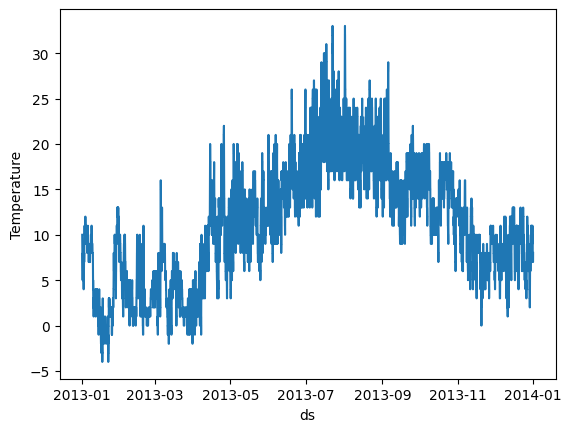

In [6]:
sns.lineplot(df['Temperature'])